In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Overview

In [2]:
def create_ages(mu=50,sigma=13,num_samples=100,seed=42):
    np.random.seed(seed)
    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    return sample_ages

In [3]:
sample = create_ages()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

C:\Users\mbatu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

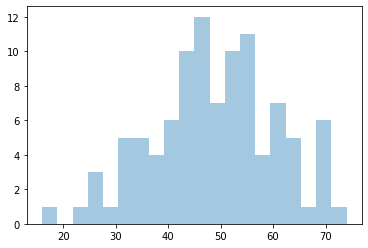

In [4]:
sns.distplot(sample,bins=20,kde=False)

C:\Users\mbatu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

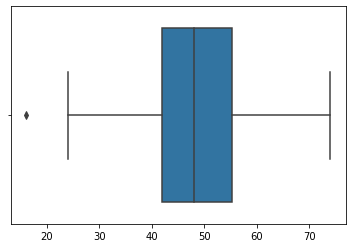

In [5]:
sns.boxplot(sample)

In [6]:
ser = pd.Series(sample)
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [7]:
IQR = 55.25000-42.00000
lower_lim = 42 - 1.5* IQR
lower_lim

22.125

In [8]:
ser[ser>lower_lim]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [9]:
q75,q25 = np.percentile(sample,[75,25])
# iqr= q75-q25

In [10]:
df=pd.read_csv("Ames_Housing_Data.csv")

In [11]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [12]:
df.corr()["SalePrice"].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

## Removing Outliers

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

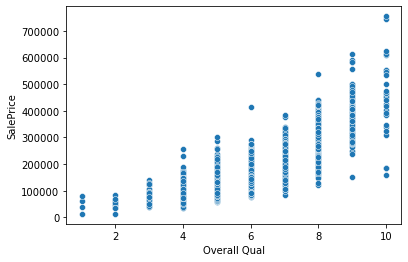

In [13]:
sns.scatterplot(data = df, x="Overall Qual", y="SalePrice")

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

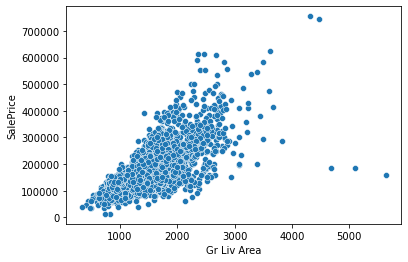

In [14]:
sns.scatterplot(data = df, x="Gr Liv Area", y="SalePrice")

In [15]:
df[(df["Overall Qual"]>8) & (df["SalePrice"]<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [16]:
drop_idx = df[(df["Gr Liv Area"]>4000) & (df["SalePrice"]<400000)].index

In [17]:
df = df.drop(drop_idx, axis = 0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

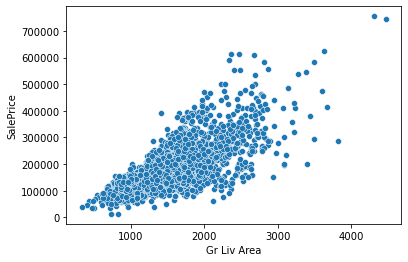

In [18]:
sns.scatterplot(data = df, x="Gr Liv Area", y="SalePrice")

## Missing Data

In [19]:
with open('../00 DATA/Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [20]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [21]:
df = df.drop("PID", axis = 1)

In [22]:
df.isnull().sum()*100 / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [23]:
def percent_missing(df):
    percent_nan = df.isnull().sum()*100 / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()

    return percent_nan

In [24]:
percent_nan = percent_missing(df)
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

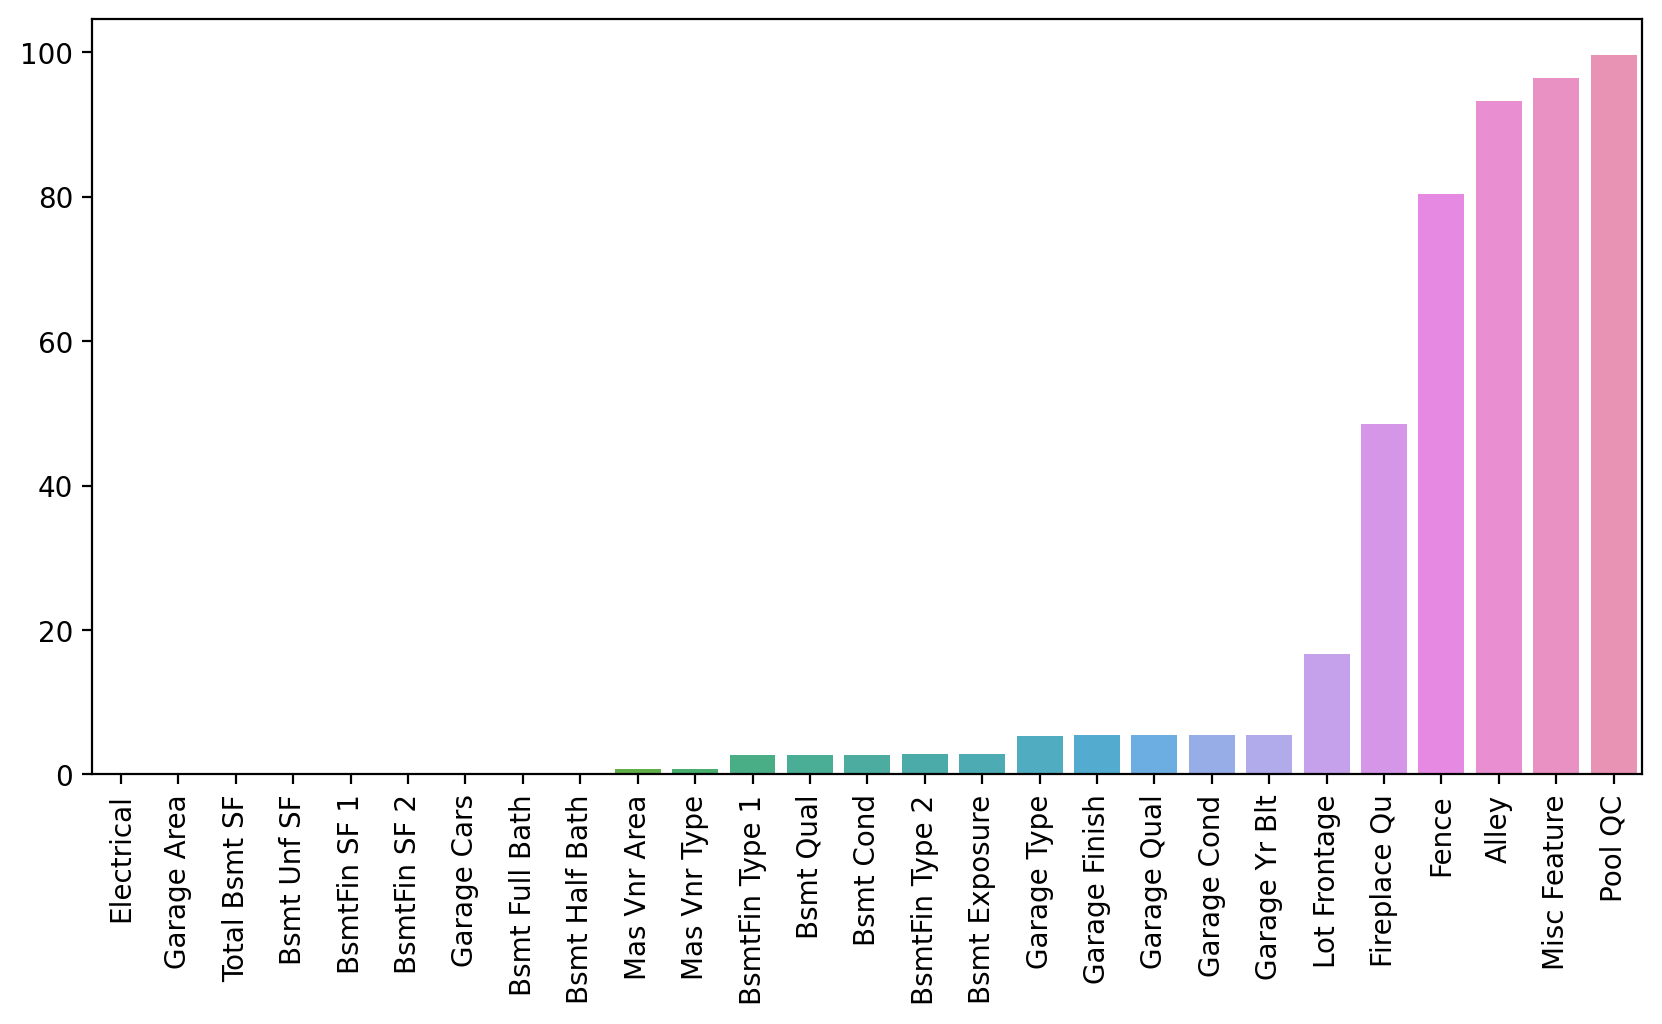

In [25]:
plt.figure(figsize=(10,5), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [26]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [27]:
100/len(df)

0.0341646737273659

In [28]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


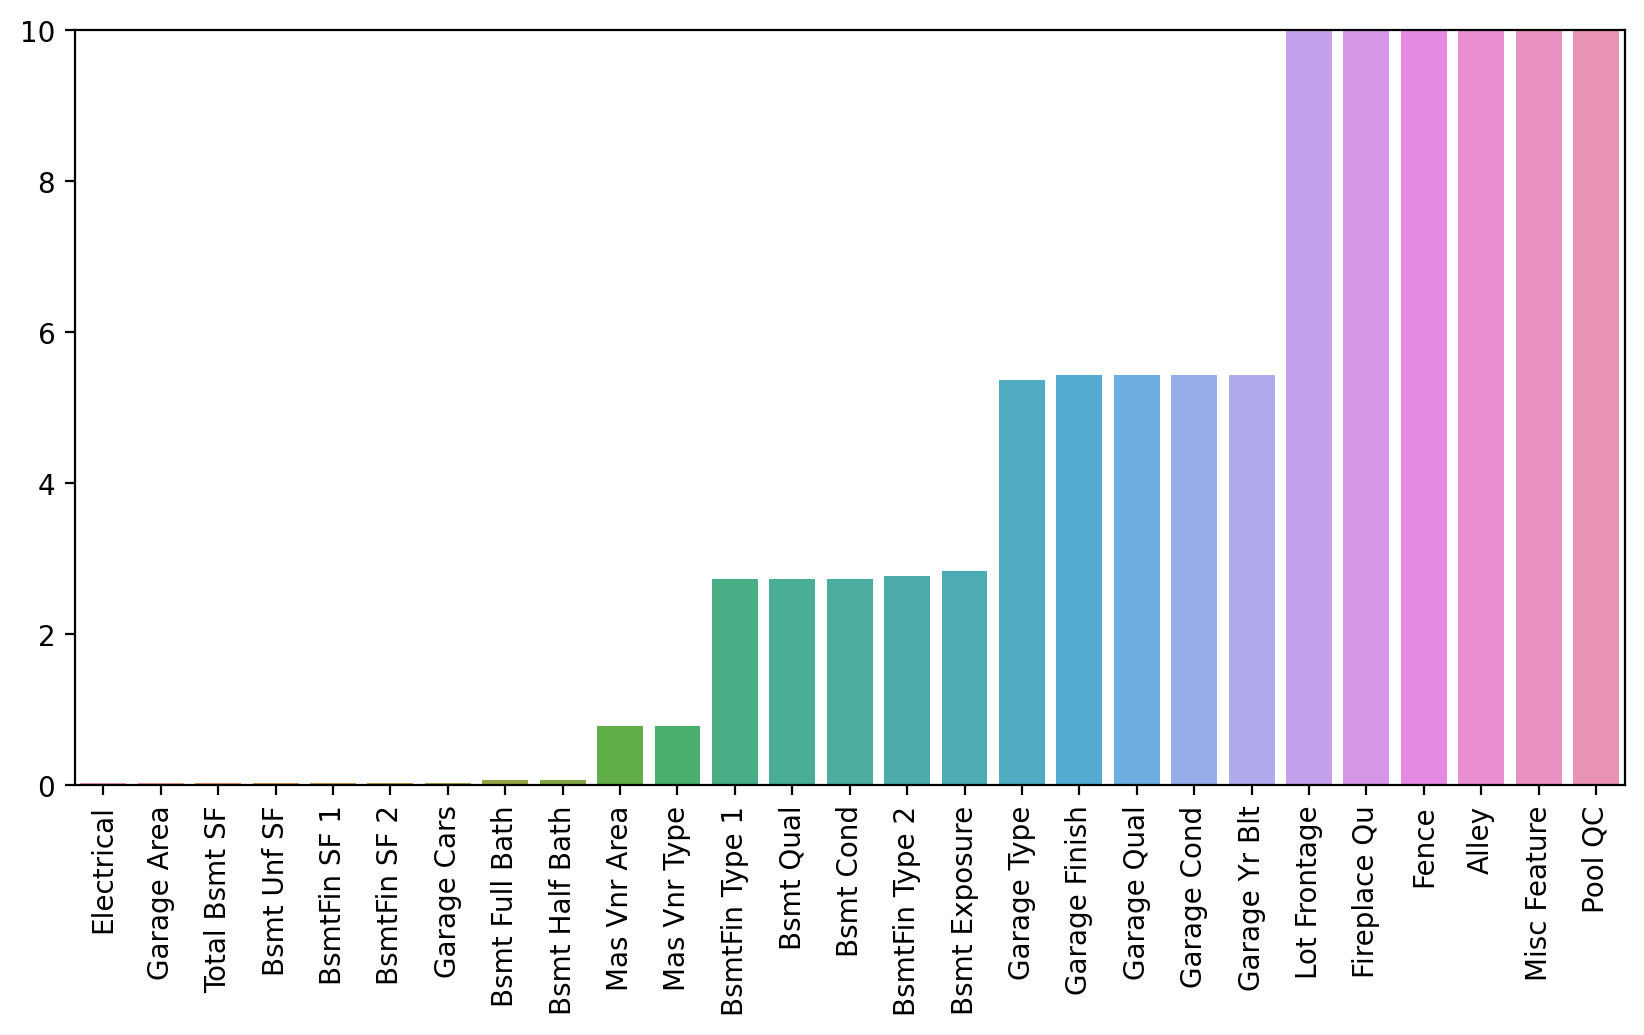

In [29]:
plt.figure(figsize=(10,5), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylim(0,10)
plt.xticks(rotation=90);

In [30]:
df = df.dropna(axis= 0, subset=["Electrical","Garage Cars"])

In [31]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

In [32]:
#Numeric
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2',
 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

#String
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond',
 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [33]:
percent_nan = percent_missing(df)

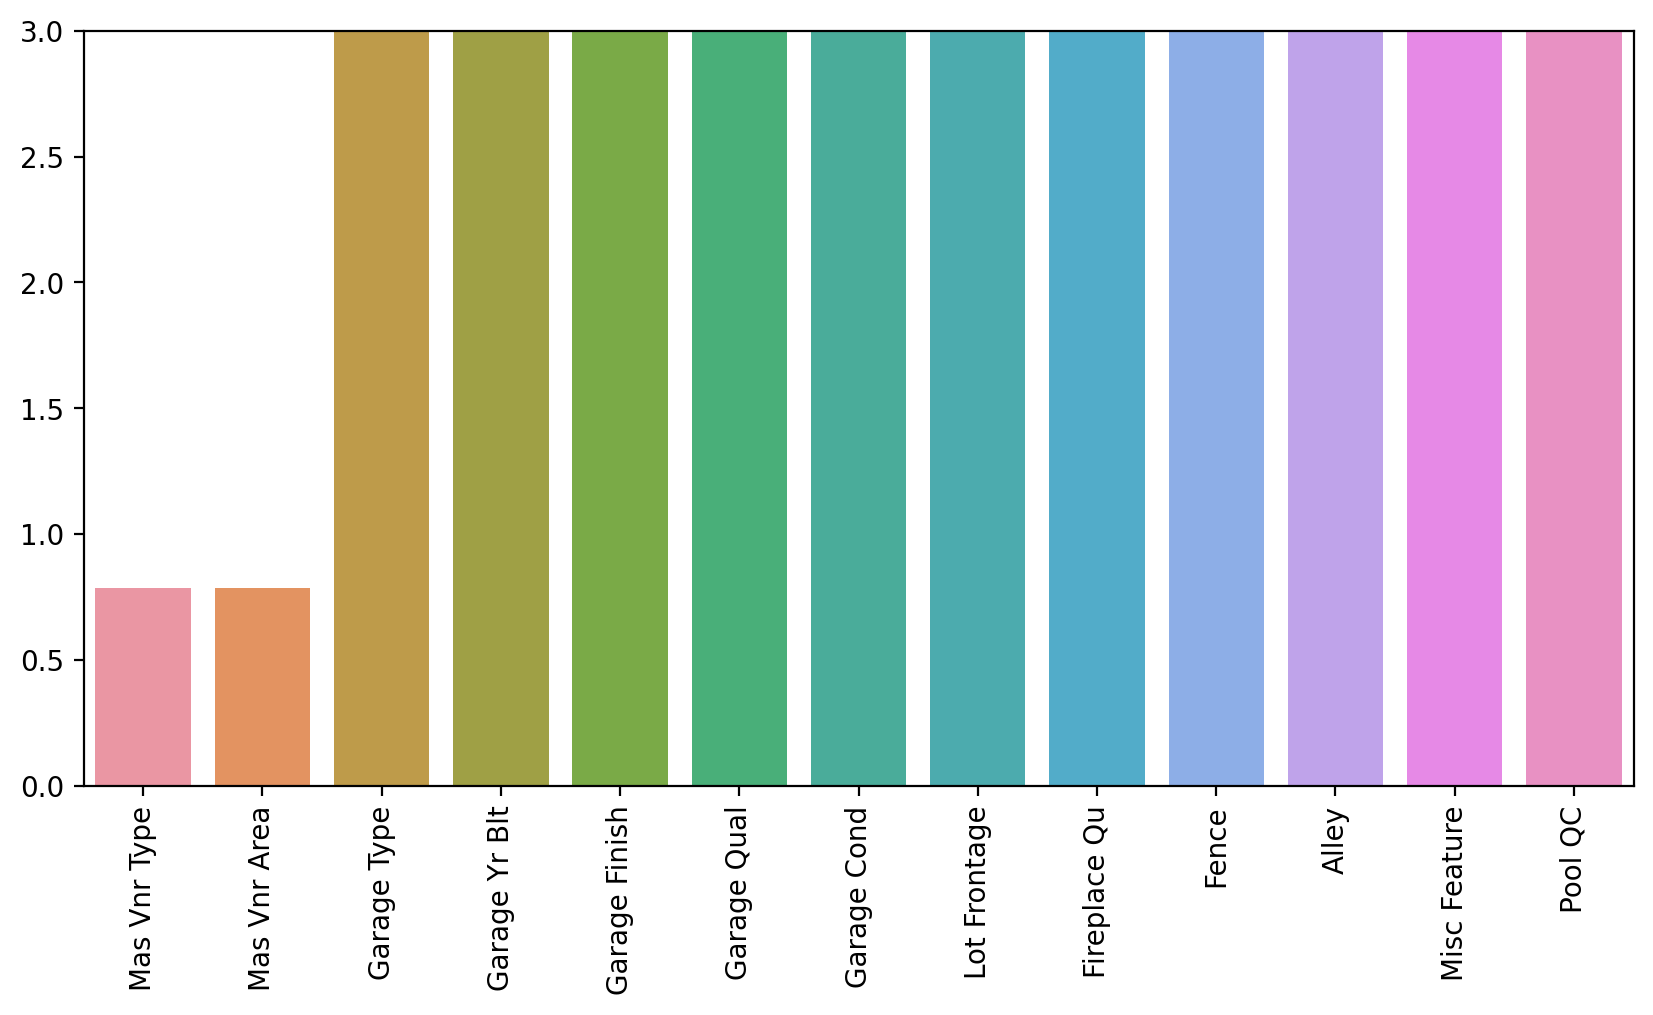

In [34]:
plt.figure(figsize=(10,5), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylim(0,3)
plt.xticks(rotation=90);

In [35]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [36]:
percent_nan = percent_missing(df)

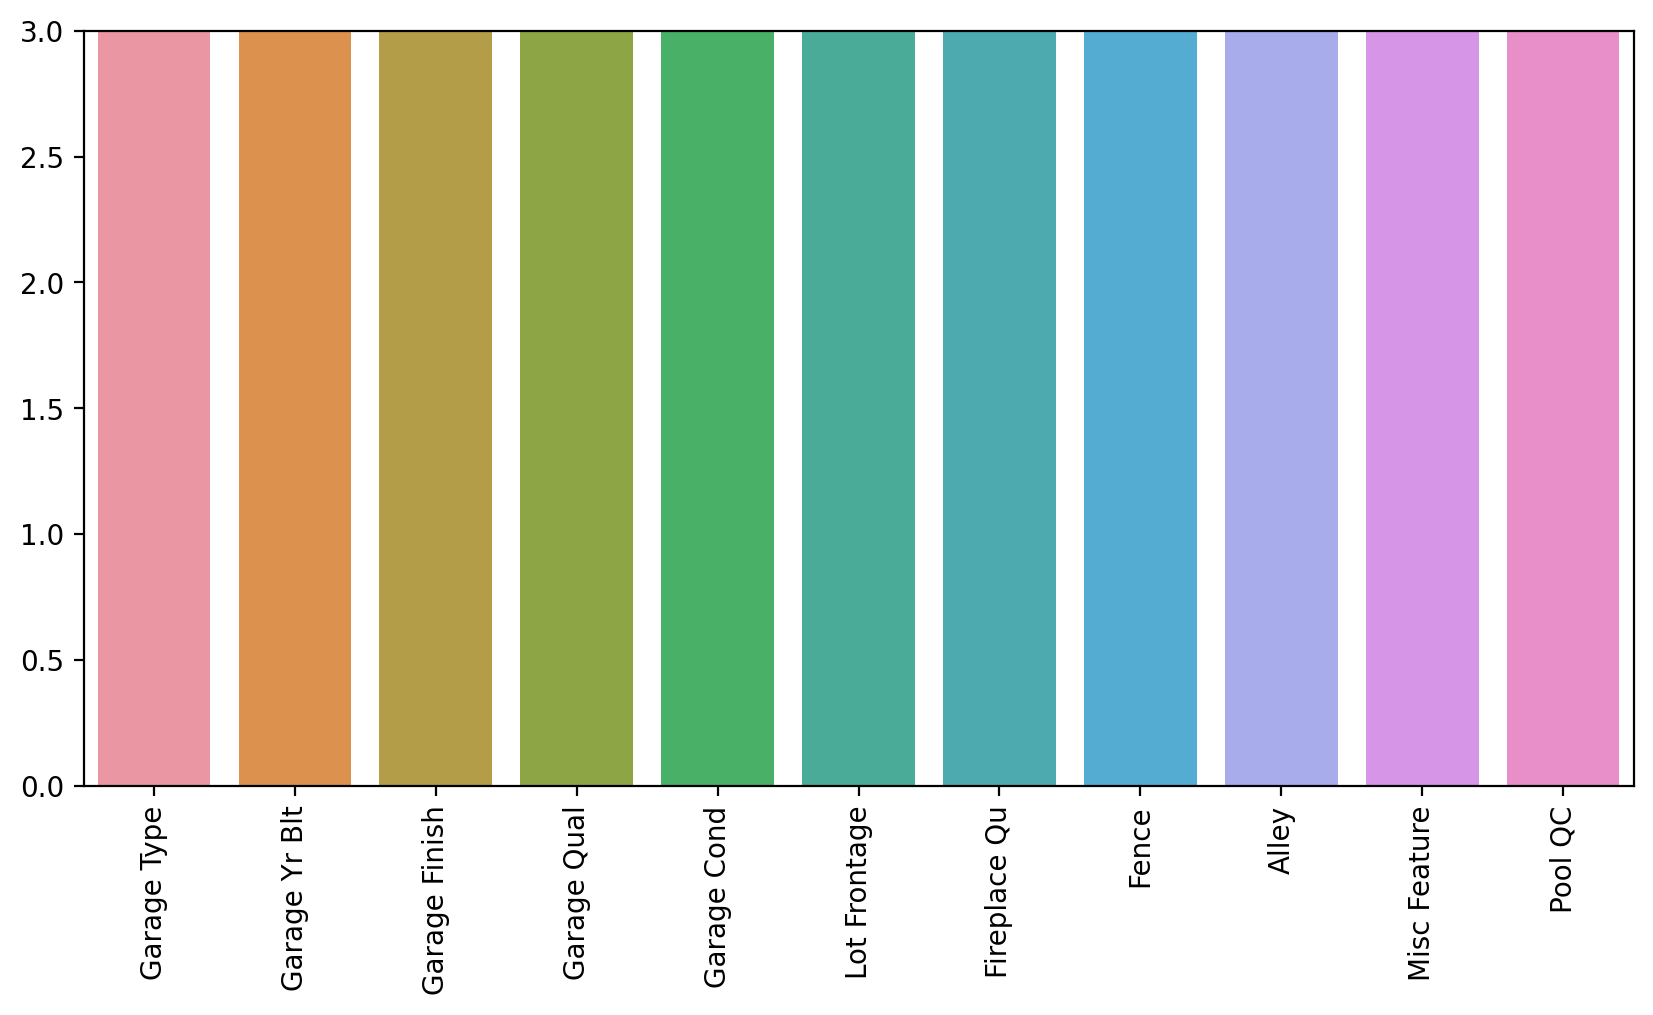

In [37]:
plt.figure(figsize=(10,5), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylim(0,3)
plt.xticks(rotation=90);

In [38]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [39]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [40]:
percent_nan = percent_missing(df)

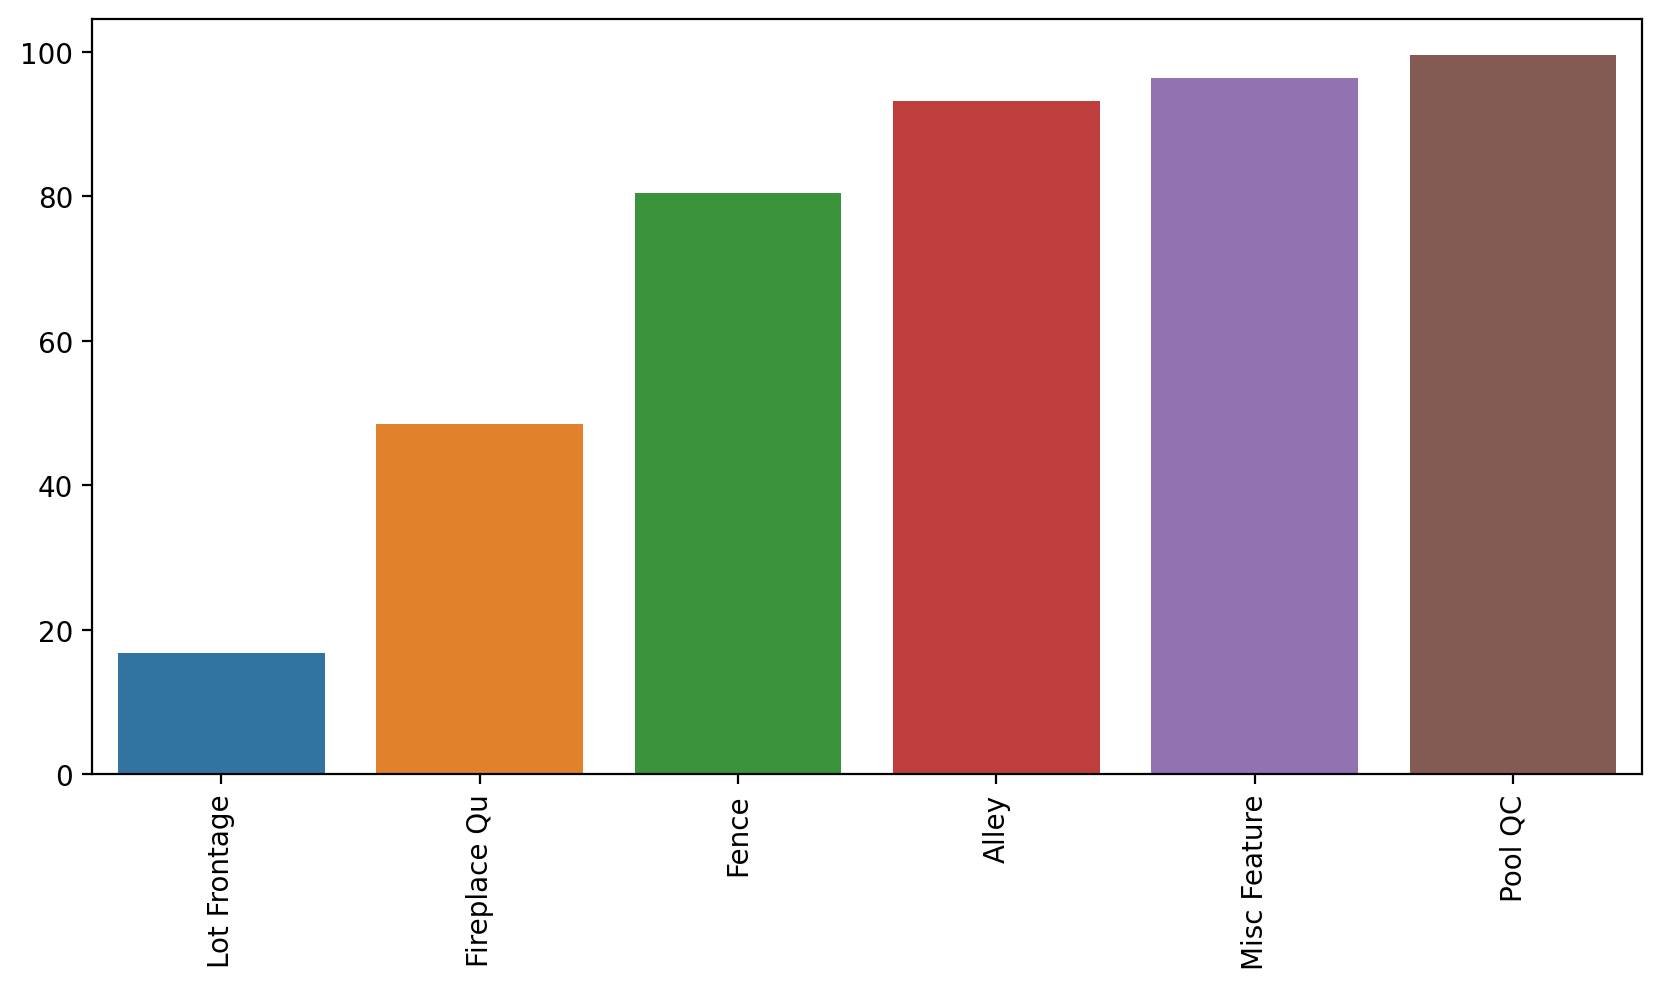

In [41]:
plt.figure(figsize=(10,5), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [42]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [43]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [44]:
percent_nan = percent_missing(df)

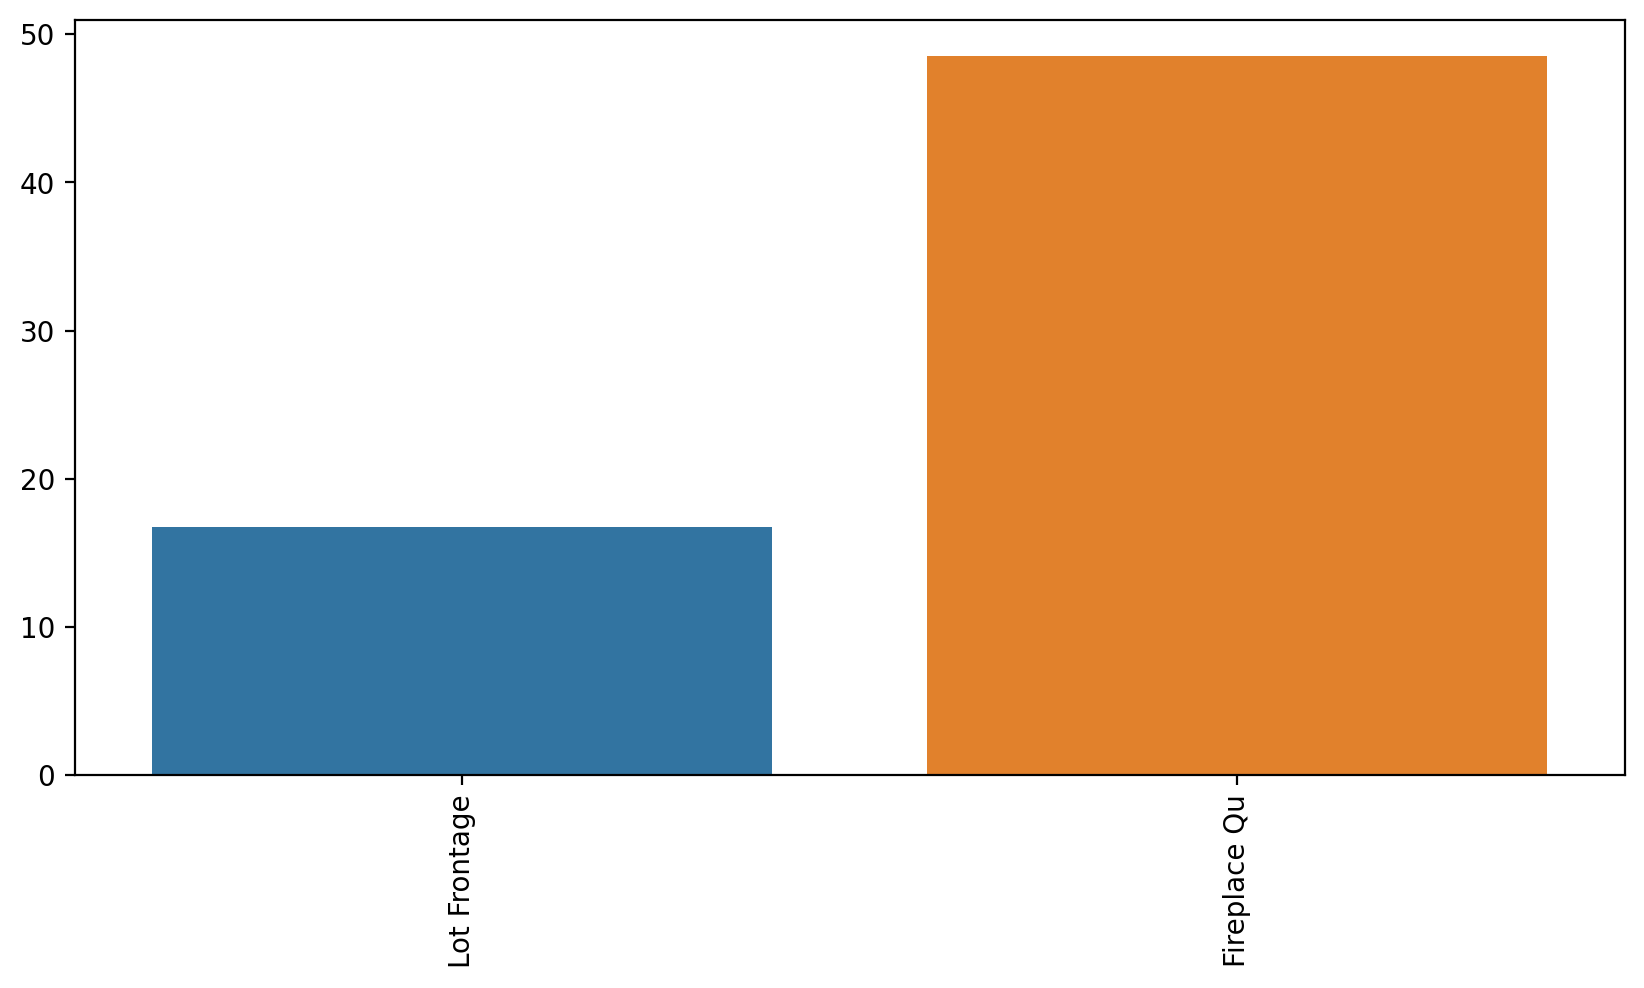

In [45]:
plt.figure(figsize=(10,5), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [46]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [47]:
percent_nan = percent_missing(df)

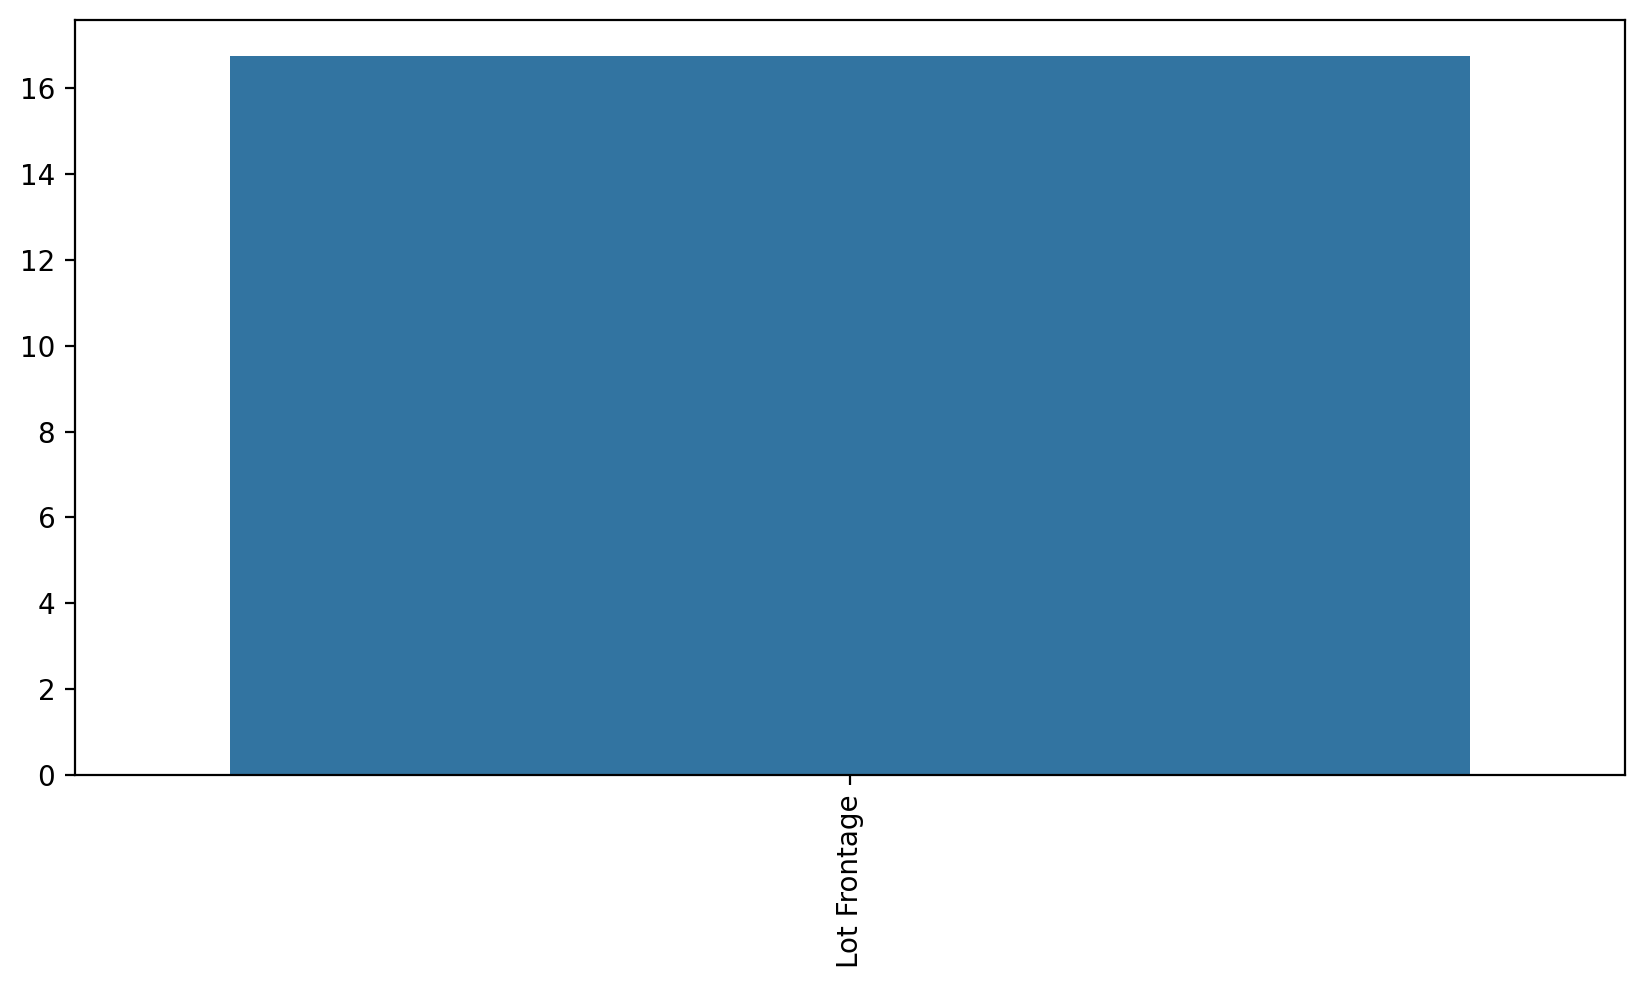

In [48]:
plt.figure(figsize=(10,5), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

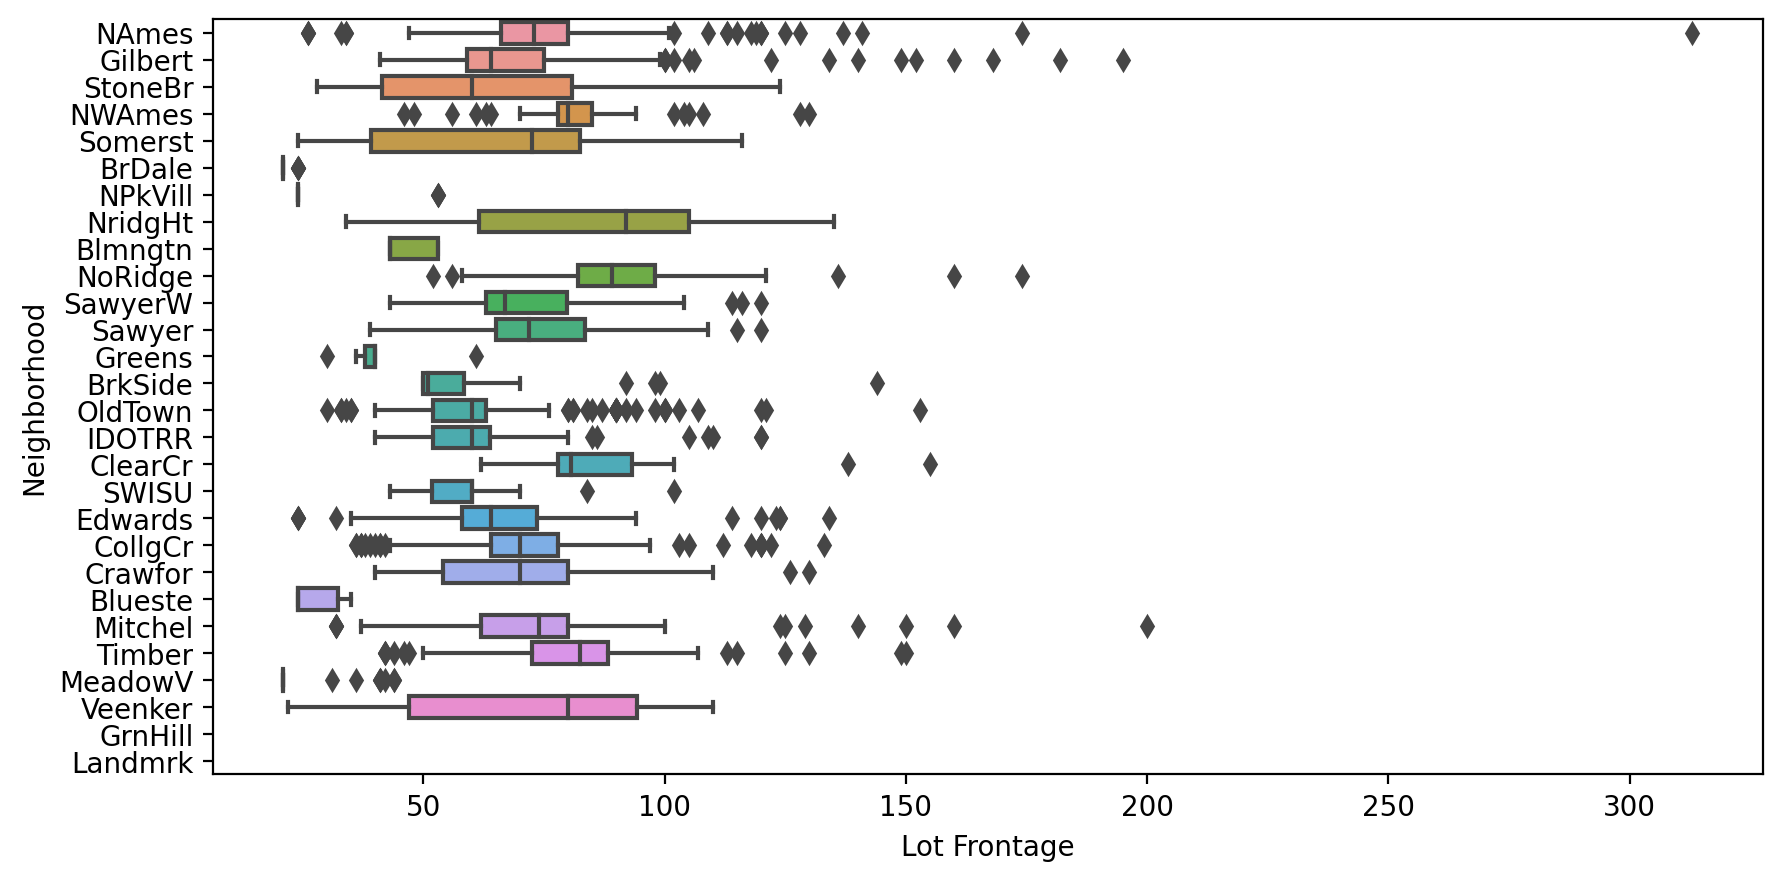

In [49]:
plt.figure(figsize=(10,5), dpi=200)
sns.boxplot(x="Lot Frontage",y="Neighborhood", data=df, orient="h")

In [50]:
df.groupby("Neighborhood")["Lot Frontage"].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [51]:
df['Lot Frontage'] = df.groupby("Neighborhood")["Lot Frontage"].transform(lambda value: value.fillna(value.mean()))
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [52]:
df["Lot Frontage"]

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2925     37.000000
2926     75.144444
2927     62.000000
2928     77.000000
2929     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [53]:
df["Lot Frontage"] = df["Lot Frontage"].fillna(0)

In [54]:
percent_nan = percent_missing(df)

In [55]:
# plt.figure(figsize=(10,5), dpi=200)
# sns.barplot(x=percent_nan.index, y=percent_nan)
# plt.xticks(rotation=90);

# # "min() arg is an empty sequence" = No data to clean or transform


In [56]:
df["MS SubClass"] = df["MS SubClass"].apply(str)

In [57]:
direction = pd.Series(["up","up","down","down"])
direction

0      up
1      up
2    down
3    down
dtype: object

In [58]:
pd.get_dummies(direction)

,down,up
0,0,1
1,0,1
2,1,0
3,1,0


In [59]:
pd.get_dummies(direction, drop_first=True)

,up
0,1
1,1
2,0
3,0


In [60]:
df.select_dtypes(include="object")

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2927,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2928,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [61]:
my_object_df = df.select_dtypes(include="object")

In [62]:
my_numeric_df = df.select_dtypes(exclude="object")

In [63]:
df_object_dummies = pd.get_dummies(my_object_df, drop_first=True)
df_object_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2926,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2928,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [64]:
final_df = pd.concat([my_numeric_df, df_object_dummies], axis=1)
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2926,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2927,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2928,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


In [65]:
final_df.corr()["SalePrice"].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

## Cross Validation Example

In [66]:
df = pd.read_csv("Advertising.csv")

In [67]:
X = df.drop("sales", axis=1)
y = df["sales"]

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [72]:
scaler.fit(X_train)

StandardScaler()

In [73]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
from sklearn.linear_model import Ridge

In [75]:
model = Ridge(alpha=100)

In [76]:
model.fit(X_train,y_train)

Ridge(alpha=100)

In [77]:
y_pred = model.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
mean_squared_error(y_test, y_pred)

7.341775789034129

In [80]:
model_two = Ridge(alpha=0)

In [81]:
model_two.fit(X_train, y_train)

Ridge(alpha=0)

In [82]:
y_pred_two = model_two.predict(X_test)

In [83]:
mean_squared_error(y_test,y_pred_two)

2.298716697886379

In [84]:
# 70% of data is training data, set aside other 30%
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=101)

# Remaining 30% is split into evaluation and test sets
# Each is 15% of the original data size
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

In [85]:
print(len(df))
print(len(X_train))
print(len(X_eval))
print(len(X_test))

200
140
30
30


In [86]:
scaler = StandardScaler()

In [87]:
scaler.fit(X_train)

StandardScaler()

In [88]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_eval = scaler.transform(X_eval)

In [89]:
model_three = Ridge(alpha=100)

In [90]:
model_three.fit(X_train,y_train)

Ridge(alpha=100)

In [91]:
y_eval_pred = model.predict(X_eval)

In [92]:
mean_squared_error(y_eval, y_eval_pred)

7.320101458823872

In [93]:
model_four = Ridge(alpha=1)

In [94]:
model_four.fit(X_train, y_train)

Ridge(alpha=1)

In [95]:
new_pred_eval = model_four.predict(X_eval)

In [96]:
mean_squared_error(y_eval, new_pred_eval)

2.3837830750569866

In [97]:
y_final_test_pred = model_four.predict(X_test)

In [98]:
mean_squared_error(y_test, y_final_test_pred)

2.254260083800517

In [108]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [109]:
scaler = StandardScaler()

In [110]:
scaler.fit(X_train)

StandardScaler()

In [111]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
model= Ridge(alpha=100)

In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
scores = cross_val_score(model, X_train, y_train,
 scoring="neg_mean_squared_error", cv=5)

In [115]:
scores

array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
        -8.38562723])

In [116]:
abs(scores.mean())

8.215396464543607

In [117]:
model= Ridge(alpha=1)

In [118]:
scores = cross_val_score(model, X_train, y_train,
 scoring="neg_mean_squared_error", cv=5)

In [119]:
abs(scores.mean())

3.344839296530695

In [122]:
model.fit(X_train,y_train)

Ridge(alpha=1)

In [123]:
y_final_test_pred_2 = model.predict(X_test)

In [124]:
mean_squared_error(y_test, y_final_test_pred_2)

2.3190215794287514

In [133]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=101)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
from sklearn.model_selection import cross_validate

In [135]:
model = Ridge(alpha=100)

In [136]:
scores = cross_validate(model, X_train, y_train,
 scoring=["neg_mean_squared_error",
          "neg_mean_absolute_error"], cv=10)

In [140]:
scores = pd.DataFrame(scores)
scores.mean()

fit_time                        0.000898
score_time                      0.000798
test_neg_mean_squared_error    -7.565121
test_neg_mean_absolute_error   -2.083773
dtype: float64

In [141]:
model = Ridge(alpha=1)

In [142]:
scores = cross_validate(model, X_train, y_train,
 scoring=["neg_mean_squared_error",
          "neg_mean_absolute_error"], cv=10)

In [144]:
scores = pd.DataFrame(scores)
scores.mean()

fit_time                        0.001496
score_time                      0.000898
test_neg_mean_squared_error    -3.323018
test_neg_mean_absolute_error   -1.308467
dtype: float64

In [145]:
model.fit(X_train, y_train)

Ridge(alpha=1)

In [146]:
y_final_test_pred_3 = model.predict(X_test)

In [147]:
mean_squared_error(y_test,y_final_test_pred_3)

2.3190215794287514

## Grid Search

In [148]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=101)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [149]:
from sklearn.linear_model import ElasticNet

In [150]:
base_elastic_net_model = ElasticNet()

In [151]:
param_grid = {
    "alpha":[0.1,1,5,10,50,100],
    "l1_ratio":[.1,.5,.7,.95,.99,1]
    }

In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
grid_model = GridSearchCV(
    estimator = base_elastic_net_model,
    param_grid= param_grid,
    scoring="neg_mean_squared_error",
    cv= 5, verbose=2
    )

In [154]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [155]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [156]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [159]:
# pd.DataFrame(grid_model.cv_results_)

In [160]:
y_pred = grid_model.predict(X_test)

In [161]:
mean_squared_error(y_test, y_pred)

2.3873426420874737

## Project Overview

In [162]:
df = pd.read_csv("../00 DATA/AMES_Final_DF.csv")

In [189]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [171]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=101)


In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

# scaled_X_train = scaler.fit_transform(X_train) 
# Üsteki 2 ve 3. satırın aynısını yapar

scaled_X_test = scaler.transform(X_test)

In [176]:
from sklearn.linear_model import ElasticNet

In [182]:
base_elastic_model = ElasticNet(max_iter=1000000)

In [183]:
param_grid = {
    "alpha":[0.1,1,5,10,50,100],
    "l1_ratio":[.1,.5,.7,.95,.99,1]
    }

In [184]:
from sklearn.model_selection import GridSearchCV

In [185]:
grid_model = GridSearchCV(
    base_elastic_model,
    param_grid= param_grid,
    scoring="neg_mean_squared_error",
    cv=5, verbose=1
)

In [186]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [187]:
 grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [190]:
y_pred = grid_model.predict(scaled_X_test)

In [191]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [192]:
mean_absolute_error(y_test,y_pred)

14195.354900562168

In [193]:
np.sqrt(mean_squared_error(y_test,y_pred))

20558.508566893164

In [194]:
np.mean(df["SalePrice"])

180815.53743589742